# **DSA 210 TERM** **PROJECT**

1. *FILTERING* *DATA*

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

lit_df = pd.read_csv('litrates.csv', skiprows=4)
wps_df = pd.read_excel('WPS Data.xlsx', skiprows=5)
gini_df = pd.read_csv('gini_coeff.csv', skiprows=4)


#filtering literacy rate by the most recent years
lit_df = lit_df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68'])
filteredlit= lit_df[['Country Name','2020','2021','2022','2023']].copy()
filteredlitrate = filteredlit.dropna(subset=['2020','2021','2022','2023'], how='all').copy()
filteredlitrate.loc[:,'Most Recent Value']= filteredlitrate[['2023','2022','2021','2020']].bfill(axis=1).iloc[:, 0]
filteredlitrate = filteredlitrate[['Country Name', 'Most Recent Value']]
filteredlitrate.rename(columns={'Most Recent Value': 'Literacy Rate'}, inplace=True)
#print(filteredlitrate)

#filtering gini-coeff data by the same years
gini_df = gini_df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68'])
filteredgini= gini_df[['Country Name','2020','2021','2022','2023']].copy()
filteredgini= filteredgini.dropna(subset=['2020','2021','2022','2023'], how='all')
filteredgini.loc[:,'Most Recent Value']= filteredgini[['2023','2022','2021','2020']].bfill(axis=1).iloc[:, 0]
filteredgini.rename(columns={'Most Recent Value': 'Gini Coefficient'}, inplace=True)
filteredgini = filteredgini[['Country Name', 'Gini Coefficient']]
#print(filteredgini)

#filtering WPS data by the same years
wps_df = wps_df.iloc[:,[1,2,5]]
wps_df= wps_df.dropna(subset=[wps_df.columns[1]])
wps_df[wps_df.columns[2]] = wps_df[wps_df.columns[2]].round(1)
wps_df.columns = ['Country Name', 'WPS Index', 'Employment Index']
#print(filteredwps)

#merging datasets by keeping countries common
merged_ds= filteredlitrate.merge(wps_df, on='Country Name', how='inner')
merged_ds= merged_ds.merge(filteredgini, on='Country Name', how='inner')
merged_ds.to_csv('merged_ds.csv', index=False)
merged_ds['Literacy Rate'] = pd.to_numeric(merged_ds['Literacy Rate'], errors='coerce')
merged_ds['WPS Index'] = pd.to_numeric(merged_ds['WPS Index'], errors='coerce')
merged_ds = merged_ds.dropna(subset=['Literacy Rate', 'WPS Index'])
#display(merged_ds.head(10))




*2.EXPLORATORY DATA ANALYSIS*

Literacy Rate Statistics
Mean: 84.5316455245018
Median: 91.04993438720706
Mode: 100.0
Minimum: 27.2800006866455
Maximum: 100.0

Gini Coefficient Statistics
Mean: 35.05978260869565
Median: 34.3
Mode: 32.9

WPS Index Statistics
Mean: 0.6785666666666665
Median: 0.6984999999999999
Mode: 0.7

Employment Index Statistics
Mean: 61.51166666666666
Median: 62.75
Mode: 71.4



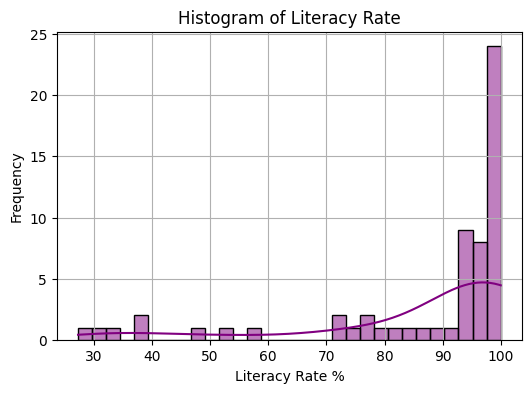

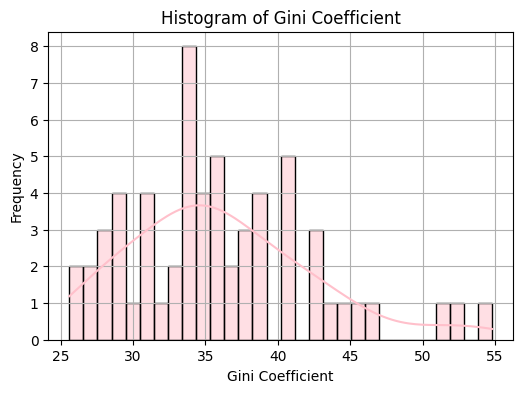

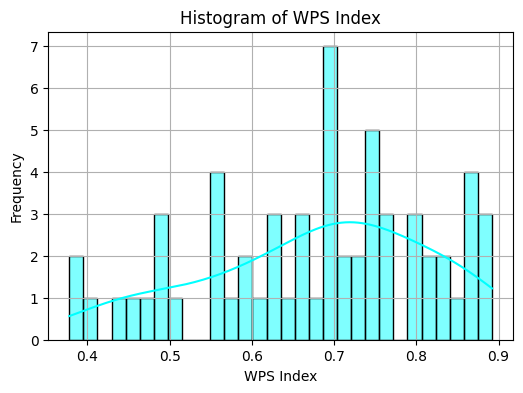

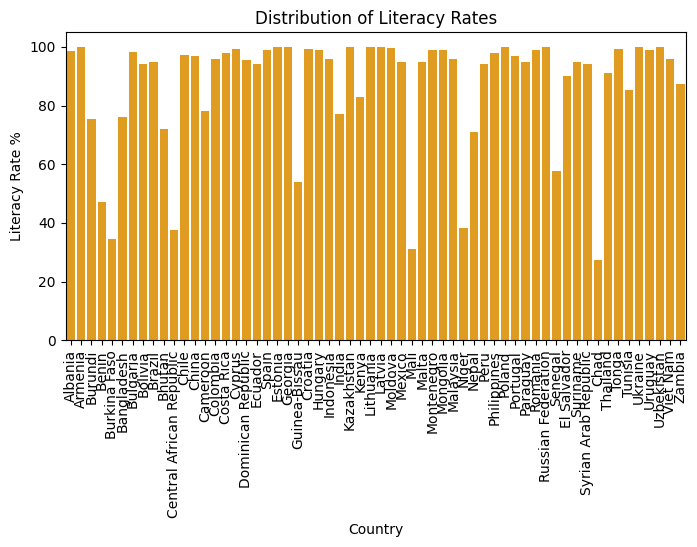

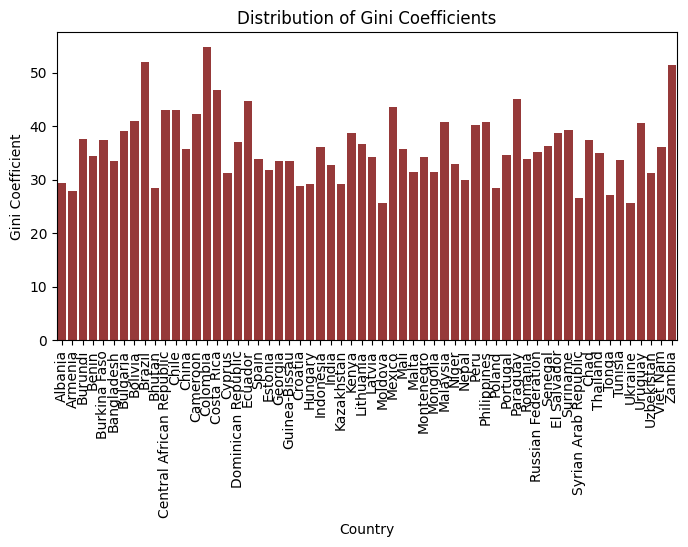

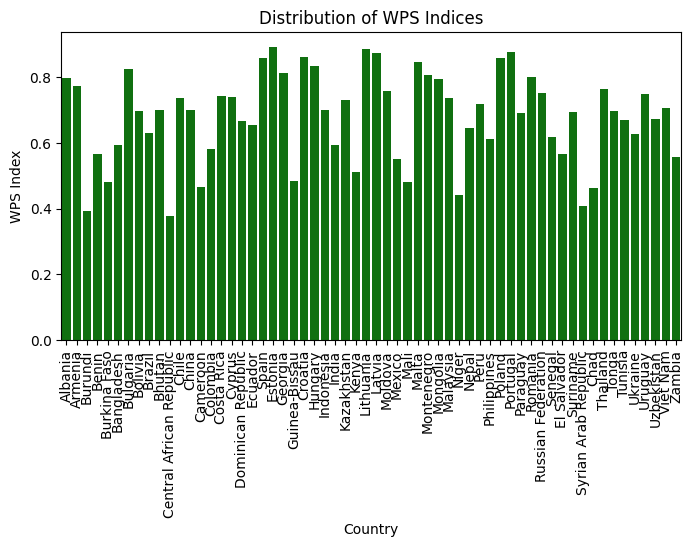

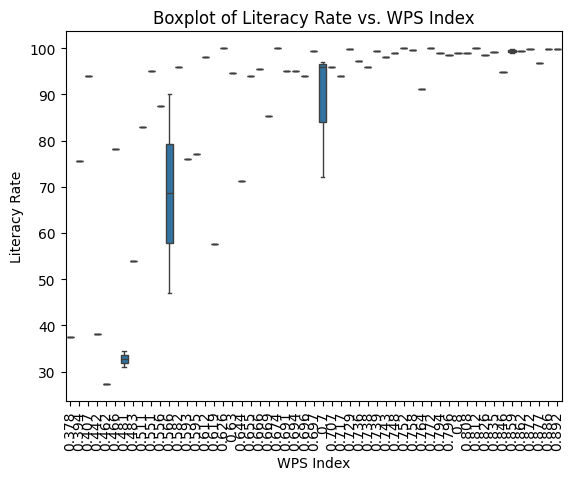

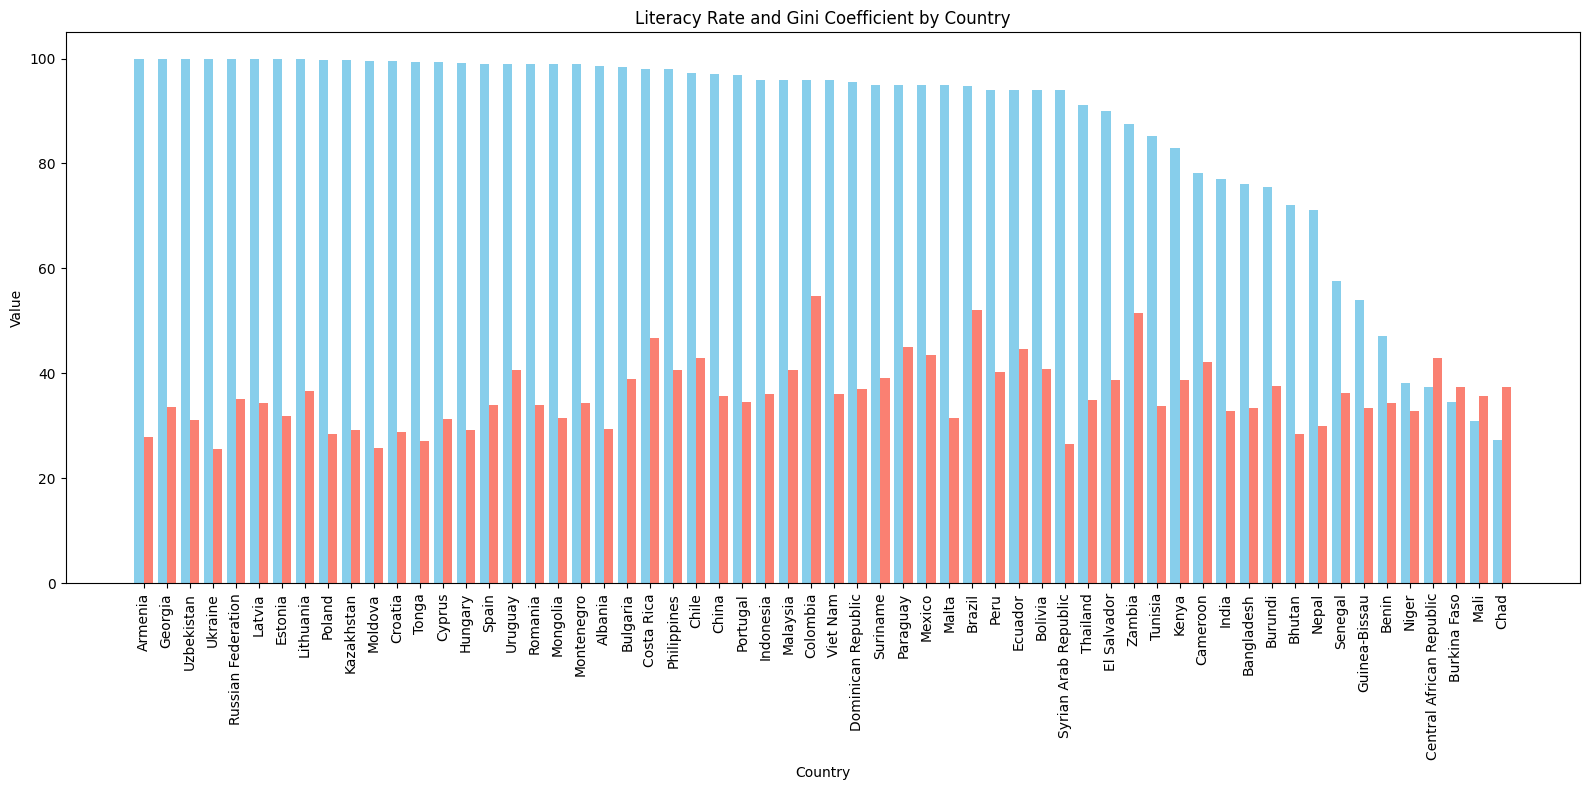

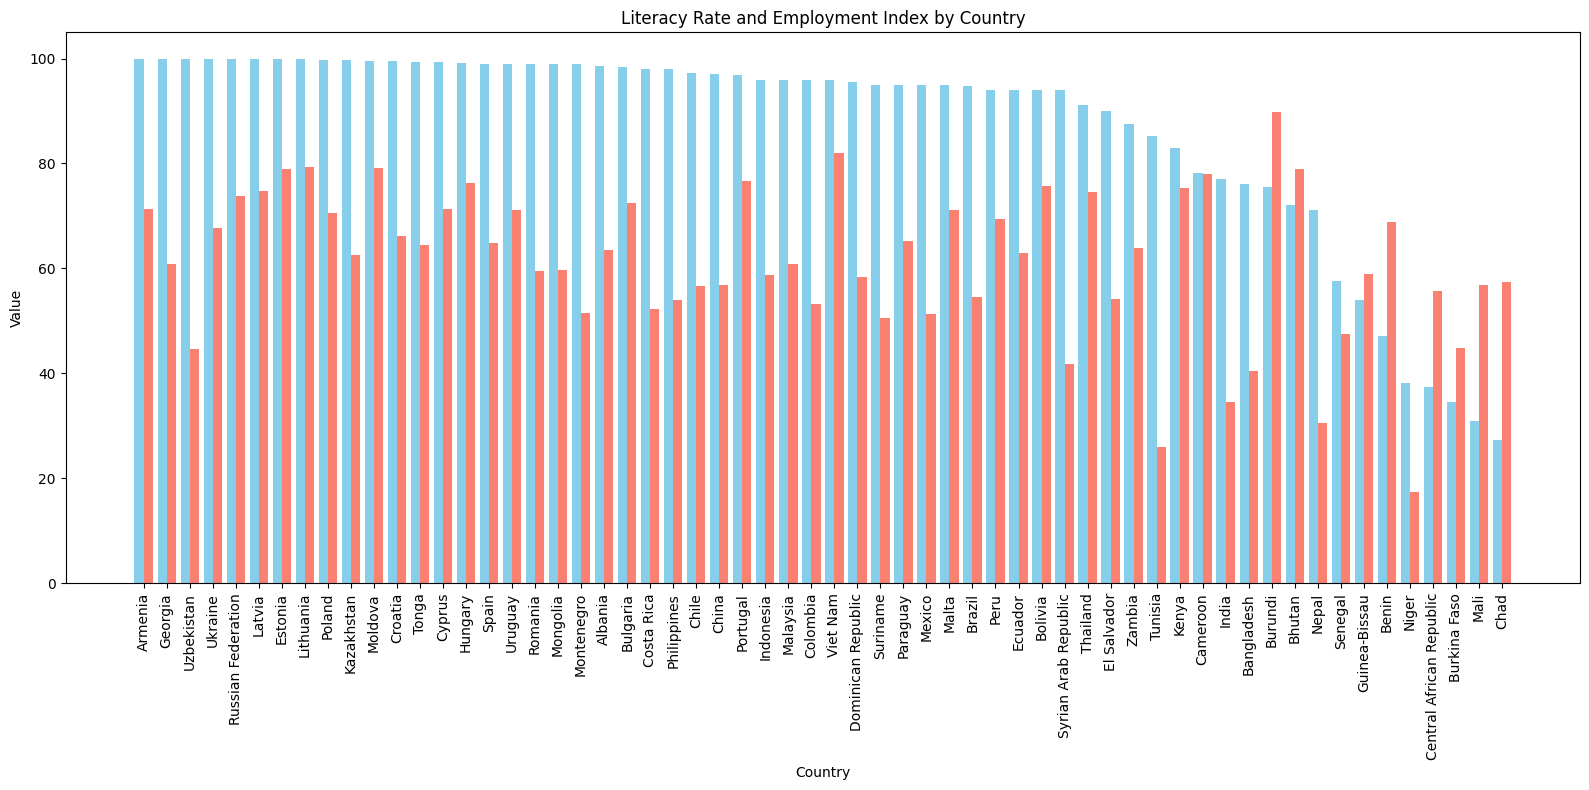

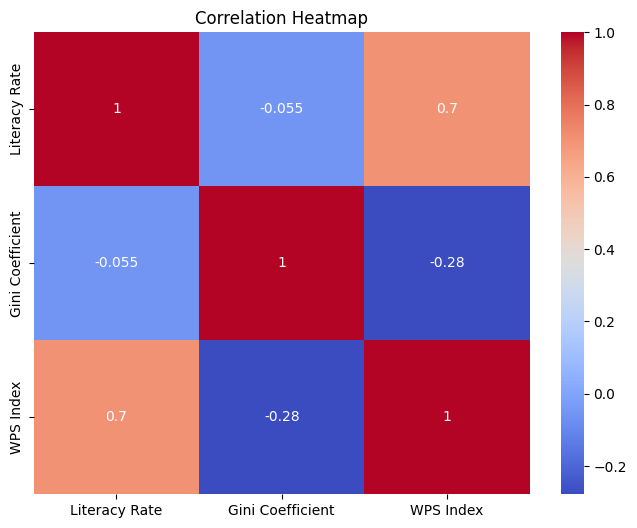

In [72]:
#visualizations

print("Literacy Rate Statistics")
print(f"Mean: {filteredlitrate['Literacy Rate'].mean()}")
print(f"Median: {filteredlitrate['Literacy Rate'].median()}")
print(f"Mode: {filteredlitrate['Literacy Rate'].mode()[0]}")
print(f"Minimum: {filteredlitrate['Literacy Rate'].min()}")
print(f"Maximum: {filteredlitrate['Literacy Rate'].max()}")
print()

print("Gini Coefficient Statistics")
print(f"Mean: {filteredgini['Gini Coefficient'].mean()}")
print(f"Median: {filteredgini['Gini Coefficient'].median()}")
print(f"Mode: {filteredgini['Gini Coefficient'].mode()[0]}")
print()

print("WPS Index Statistics")
print(f"Mean: {merged_ds['WPS Index'].mean()}")
print(f"Median: {merged_ds['WPS Index'].median()}")
print(f"Mode: {merged_ds['WPS Index'].mode()[0]}")
print()

print("Employment Index Statistics")
print(f"Mean: {merged_ds['Employment Index'].mean()}")
print(f"Median: {merged_ds['Employment Index'].median()}")
print(f"Mode: {merged_ds['Employment Index'].mode()[0]}")
print()


plt.figure(figsize=(6, 4))
sns.histplot(merged_ds['Literacy Rate'], bins=30, color='purple', edgecolor='black', kde= True)
plt.title('Histogram of Literacy Rate')
plt.xlabel('Literacy Rate %')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
print("\n" * 3)

plt.figure(figsize=(6, 4))
sns.histplot(merged_ds['Gini Coefficient'], bins=30, color='pink', edgecolor='black',kde= True)
plt.title('Histogram of Gini Coefficient')
plt.xlabel('Gini Coefficient')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
print("\n" * 3)

plt.figure(figsize=(6, 4))
sns.histplot(merged_ds['WPS Index'], bins=30, color='cyan', edgecolor='black',kde= True)
plt.title('Histogram of WPS Index')
plt.xlabel('WPS Index')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
print("\n" * 3)

plt.figure(figsize=(8, 4))
sns.barplot(x='Country Name', y='Literacy Rate', data=merged_ds, color= 'orange')
plt.title('Distribution of Literacy Rates')
plt.xlabel('Country')
plt.ylabel('Literacy Rate %')
plt.xticks(rotation=90)
plt.show()
print("\n" * 3)

plt.figure(figsize=(8, 4))
sns.barplot(x='Country Name', y='Gini Coefficient', data=merged_ds, color= 'brown')
plt.title('Distribution of Gini Coefficients')
plt.xlabel('Country')
plt.ylabel('Gini Coefficient')
plt.xticks(rotation=90)
plt.show()
print("\n" * 3)

plt.figure(figsize=(8, 4))
sns.barplot(x='Country Name', y='WPS Index', data=merged_ds, color= 'green')
plt.title('Distribution of WPS Indices')
plt.xlabel('Country')
plt.ylabel('WPS Index')
plt.xticks(rotation=90)
plt.show()
print("\n" * 3)

sns.boxplot(x='WPS Index', y='Literacy Rate', data=merged_ds)
plt.title('Boxplot of Literacy Rate vs. WPS Index')
plt.xlabel('WPS Index')
plt.xticks(rotation=90)
plt.ylabel('Literacy Rate')
plt.show()
print("\n" * 3)

bardata = merged_ds[['Country Name', 'Literacy Rate', 'Gini Coefficient']].sort_values(by='Literacy Rate', ascending=False)
x = np.arange(len(bardata['Country Name']))
width = 0.4
plt.figure(figsize=(16, 8))
plt.bar(x - width/2, bardata['Literacy Rate'], width=width, label='Literacy Rate', color='skyblue')
plt.bar(x + width/2, bardata['Gini Coefficient'], width=width, label='Gini Coefficient', color='salmon')
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Literacy Rate and Gini Coefficient by Country')
plt.xticks(ticks=x, labels=bardata['Country Name'], rotation=90)
plt.tight_layout()
plt.show()
print("\n" * 3)

bar_data = merged_ds[['Country Name', 'Literacy Rate', 'Employment Index']].sort_values(by='Literacy Rate', ascending=False)
x = np.arange(len(bar_data['Country Name']))
width = 0.4
plt.figure(figsize=(16, 8))
plt.bar(x - width/2, bar_data['Literacy Rate'], width=width, label='Literacy Rate', color='skyblue')
plt.bar(x + width/2, bar_data['Employment Index'], width=width, label='Employment Index', color='salmon')
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Literacy Rate and Employment Index by Country')
plt.xticks(ticks=x, labels=bar_data['Country Name'], rotation=90)
plt.tight_layout()
plt.show()
print("\n" * 3)


plt.figure(figsize=(8, 6))
sns.heatmap(merged_ds[['Literacy Rate', 'Gini Coefficient', 'WPS Index']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
print("\n" * 3)





*3. HYPOTHESIS TESTING*

Pearson Correlation Coefficient: 0.70
P-value: 4.66e-10




There is a statistically significant correlation between Literacy Rate and WPS Index.






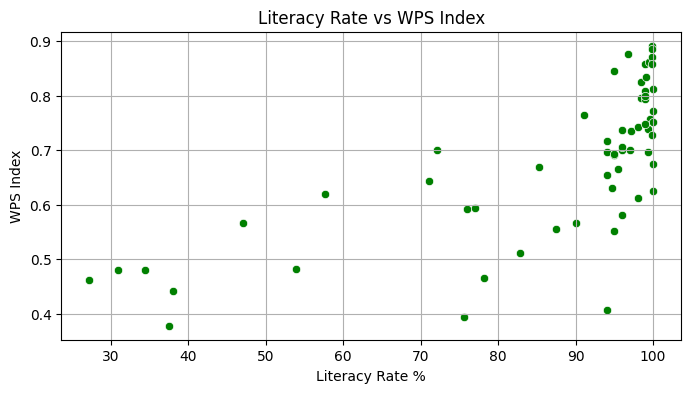

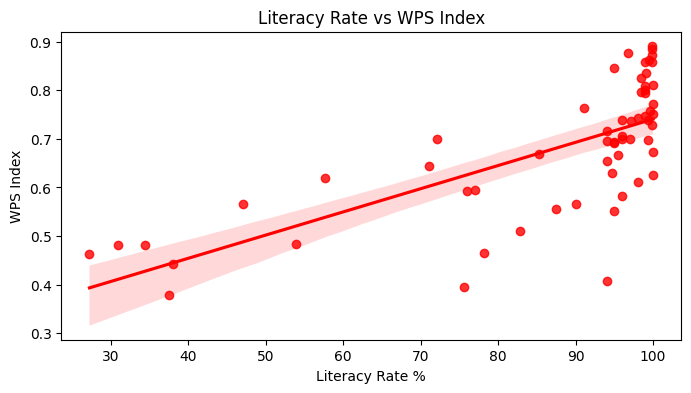





Pearson Correlation Coefficient: -0.06
P-value: 6.74e-01
There is no statistically significant correlation between Literacy Rate and Gini Coefficient.






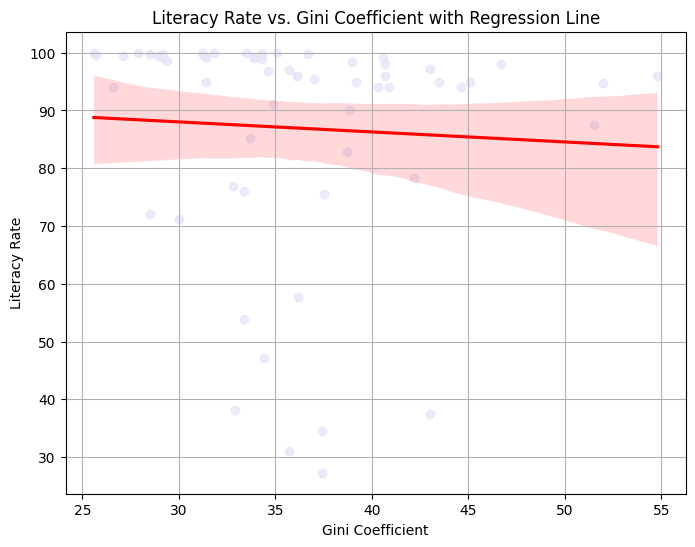

Pearson Correlation Coefficient: 0.34
P-value: 7.51e-03
There is a statistically significant correlation between Employment Index and Literacy Rate.






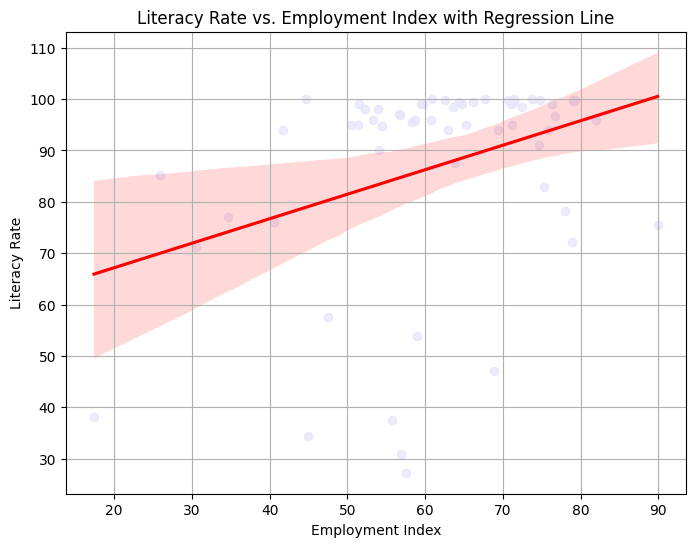

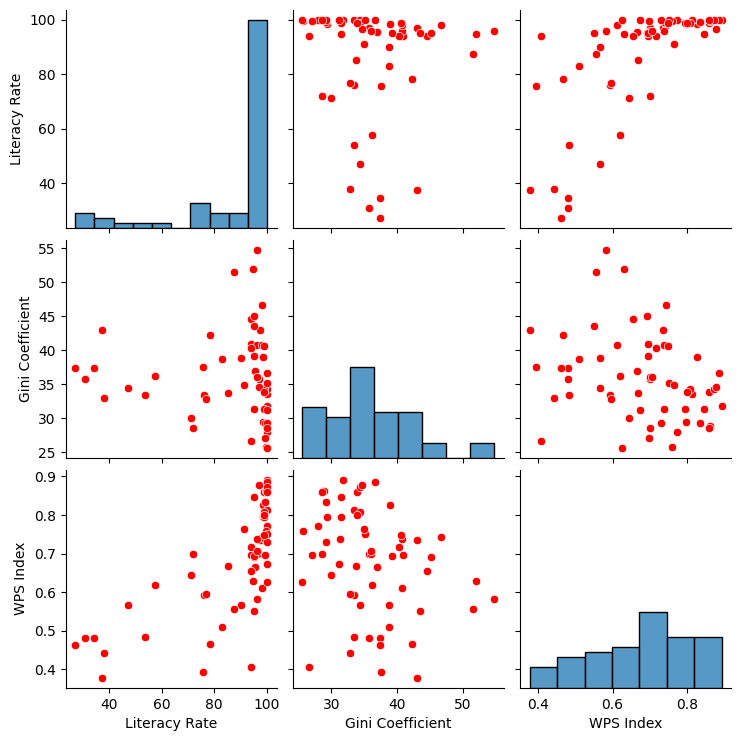

In [66]:
from scipy.stats import pearsonr
correlation, pvalue = pearsonr(merged_ds['Literacy Rate'], merged_ds['WPS Index'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {pvalue:.2e}")
print("\n" * 3)

if correlation > 0:
    pvalue_onetailed = pvalue / 2
else:
    pvalue_onetailed = 1 - (pvalue / 2)

if pvalue < 0.05:
    print("There is a statistically significant correlation between Literacy Rate and WPS Index.")
else:
    print("There is no statistically significant correlation between Literacy Rate and WPS Index.")
print("\n" * 3)


plt.figure(figsize=(8, 4))
sns.scatterplot(x="Literacy Rate", y="WPS Index", data=merged_ds, color='green')
plt.title('Literacy Rate vs WPS Index')
plt.xlabel('Literacy Rate %')
plt.ylabel('WPS Index')
plt.grid(True)
plt.show()
print("\n" * 3)

plt.figure(figsize=(8, 4))
sns.regplot(x="Literacy Rate", y="WPS Index", data=merged_ds, color='red')
plt.title('Literacy Rate vs WPS Index')
plt.xlabel('Literacy Rate %')
plt.ylabel('WPS Index')
plt.show()
print("\n" * 3)

correlation, pvalue = pearsonr(merged_ds['Literacy Rate'], merged_ds['Gini Coefficient'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {pvalue:.2e}")

if correlation > 0:
    pvalue_onetailed = pvalue / 2
else:
    pvalue_onetailed = 1 - (pvalue / 2)

if pvalue < 0.05:
    print("There is a statistically significant correlation between Literacy Rate and Gini Coefficient.")
else:
    print("There is no statistically significant correlation between Literacy Rate and Gini Coefficient.")
print("\n" * 3)

plt.figure(figsize=(8, 6))
sns.regplot(x=merged_ds['Gini Coefficient'], y=merged_ds['Literacy Rate'], scatter_kws={'color': 'lavender'}, line_kws={'color': 'red'})
plt.title('Literacy Rate vs. Gini Coefficient with Regression Line')
plt.xlabel('Gini Coefficient')
plt.ylabel('Literacy Rate')
plt.grid(True)
plt.show()

correlation, pvalue = pearsonr(merged_ds['Employment Index'], merged_ds['Literacy Rate'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {pvalue:.2e}")

if correlation > 0:
    pvalue_onetailed = pvalue / 2
else:
    pvalue_onetailed = 1 - (pvalue / 2)

if pvalue < 0.05:
    print("There is a statistically significant correlation between Employment Index and Literacy Rate.")
else:
    print("There is no statistically significant correlation between Employment Index and Literacy Rate.")
print("\n" * 3)

plt.figure(figsize=(8, 6))
sns.regplot(x=merged_ds['Employment Index'], y=merged_ds['Literacy Rate'], scatter_kws={'color': 'lavender'}, line_kws={'color': 'red'})
plt.title('Literacy Rate vs. Employment Index with Regression Line')
plt.xlabel('Employment Index')
plt.ylabel('Literacy Rate')
plt.grid(True)
plt.show()
print("\n" * 3)

pairplot_data = merged_ds[['Literacy Rate', 'Gini Coefficient', 'WPS Index']]
sns.pairplot(pairplot_data, plot_kws={'color': 'red'})
plt.show()


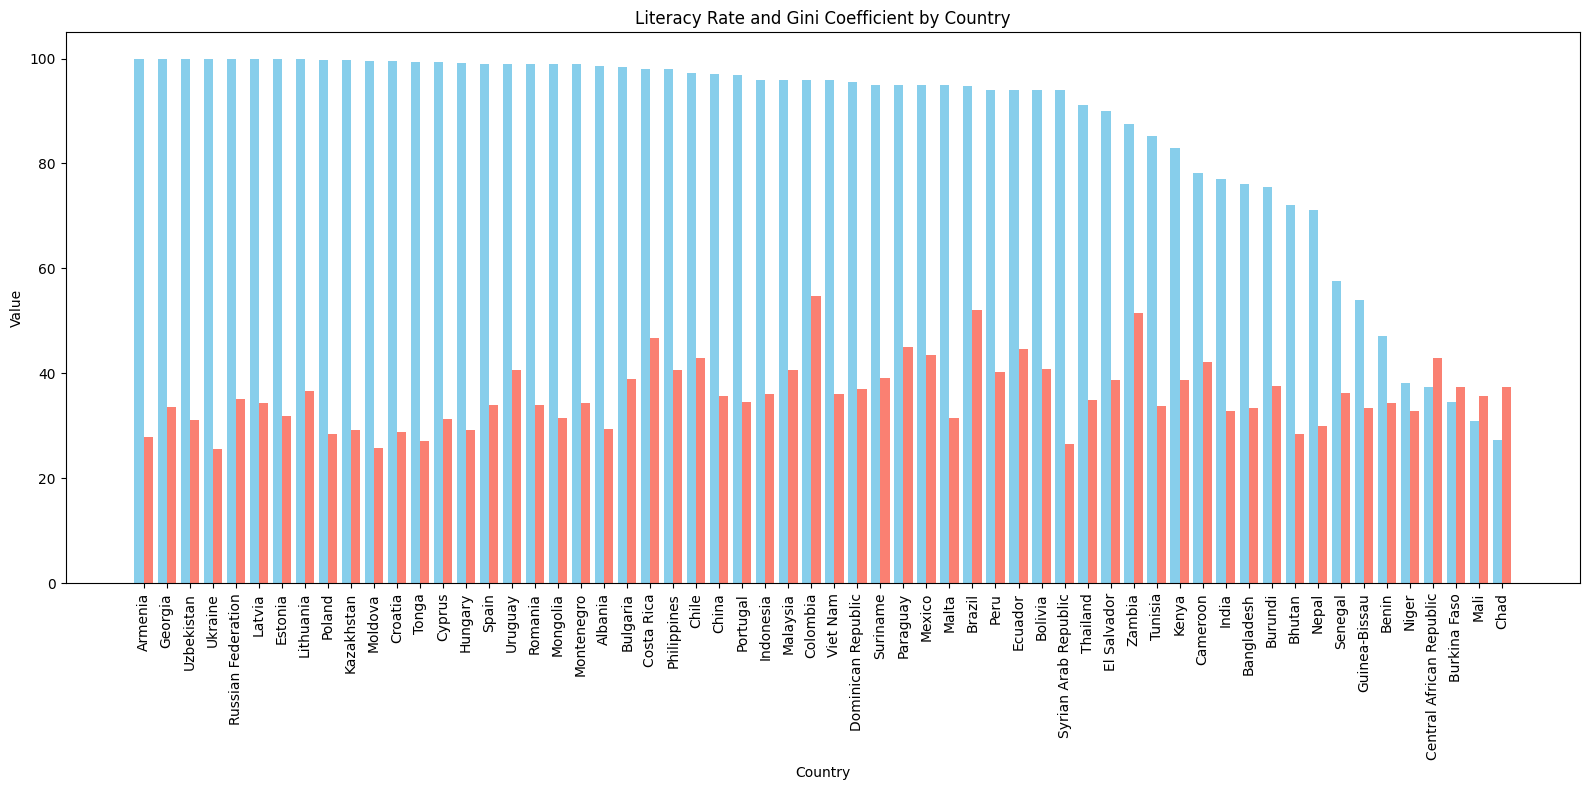